In [10]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Read the 'g' object from the pickle file
with open('../networks/g_objects/g_global_weighted.pkl', 'rb') as f:
    g = pickle.load(f)


import networkx as nx
import matplotlib.pyplot as plt


# Use a layout to position nodes (e.g., spring layout)
pos = nx.spring_layout(g)

# pos is a dictionary with node positions
print(pos)

# You can also visualize the graph with these positions
nx.draw(g, pos, with_labels=True)
plt.show()

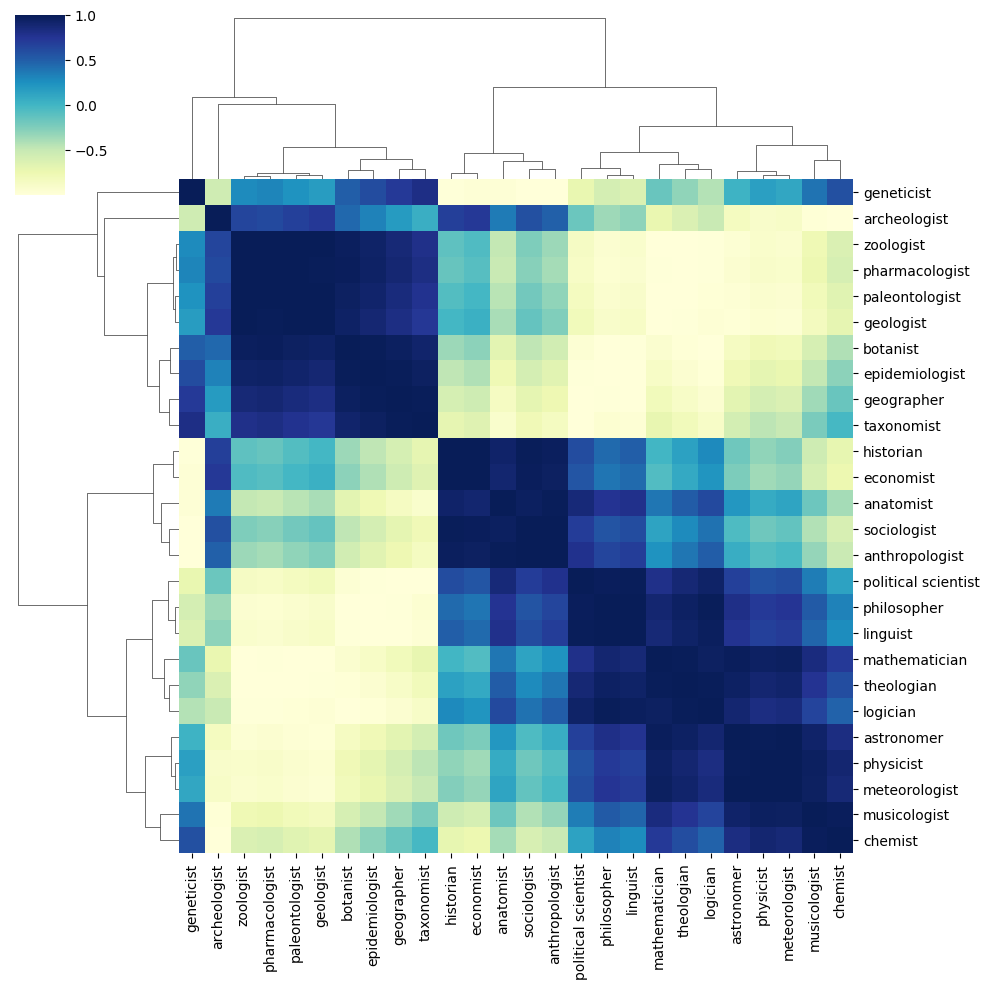

In [19]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the 'g' object from the pickle file
with open('../networks/g_objects/g_global_weighted.pkl', 'rb') as f:
    g = pickle.load(f)

# Use a layout to position nodes (e.g., spring layout)
pos = nx.spring_layout(g)

occupations = ['zoologist', 'botanist', 'geographer', 'philosopher', 'theologian', 'mathematician', 'astronomer', 'taxonomist', 'sociologist', 'anthropologist', 'historian', 'political scientist', 'linguist', 'physicist', 'musicologist', 'pharmacologist', 'paleontologist', 'geologist', 'meteorologist', 'logician', 'geneticist', 'chemist', 'epidemiologist', 'economist', 'archeologist', 'anatomist']

# Function to calculate cosine similarity between position vectors
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    return dot_product / (norm1 * norm2)

# Calculate cosine similarity matrix between position vectors
similarity_matrix = np.zeros((len(occupations), len(occupations)))

for i, occupation_i in enumerate(occupations):
    for j, occupation_j in enumerate(occupations):
        pos_i = pos[occupation_i]
        pos_j = pos[occupation_j]
        similarity_matrix[i][j] = cosine_similarity(pos_i, pos_j)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=occupations, columns=occupations)

# Create a clustermap
sns.clustermap(similarity_df, cmap="YlGnBu", figsize=(10, 10))
plt.show()